# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read dataset

In [2]:
dfs = pd.read_excel('example.xlsx')

# analyse data

In [3]:
print("\nnumber of samples : " , dfs.count().max())
print(dfs.columns)


number of samples :  9913
Index(['Unnamed: 0', 'Reference', 'Analysis', 'Design', 'Coding', 'github',
       'Testing', 'Results', 'Report', 'Presentation', 'Proposal',
       'NumOfMeetings', 'Evaluation'],
      dtype='object')


In [4]:
dfs.head()

,Unnamed: 0,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,0,44,50,1,57,67,81,43,60,97,67,90,one
1,1,22,38,2,24,45,9,65,17,8,5,30,three
2,2,17,35,0,50,59,19,31,12,27,12,10,one
3,3,17,98,61,9,8,4,0,21,63,63,10,one
4,4,8,9,10,7,59,42,23,6,49,83,80,two


In [5]:
print("The number of samples in the class 'red' : " , dfs['Evaluation'][dfs['Evaluation'] == 'one'].count())
print("The number of samples in the class 'orange' : " , dfs['Evaluation'][dfs['Evaluation'] == 'two'].count())
print("The number of samples in the class 'green' : " , dfs['Evaluation'][dfs['Evaluation'] == 'three'].count())

The number of samples in the class 'red' :  3371
The number of samples in the class 'orange' :  3321
The number of samples in the class 'green' :  3221


# preprocessing

In [6]:
dfs = dfs.drop(['Unnamed: 0'], axis=1)

In [7]:
dfs.head()

,Reference,Analysis,Design,Coding,github,Testing,Results,Report,Presentation,Proposal,NumOfMeetings,Evaluation
0,44,50,1,57,67,81,43,60,97,67,90,one
1,22,38,2,24,45,9,65,17,8,5,30,three
2,17,35,0,50,59,19,31,12,27,12,10,one
3,17,98,61,9,8,4,0,21,63,63,10,one
4,8,9,10,7,59,42,23,6,49,83,80,two


In [8]:
X = dfs.drop(['Evaluation'], axis=1)
y = dfs['Evaluation']

#### Data Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=42)
X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)
# X_train, X_test, X_valid = X_train.reset_index(drop=True), X_test.reset_index(drop=True), X_valid.reset_index(drop=True)
# y_train, y_test, y_valid = y_train.reset_index(drop=True), y_test.reset_index(drop=True), y_valid.reset_index(drop=True)

# building and training model

In [10]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='tanh',solver='sgd', hidden_layer_sizes=(5,), max_iter=5000, random_state=1).fit(X_train,y_train)
print("Test score: {:.2f}".format(MLP.score(X_test, y_test)))

Test score: 0.33


عرض دقة الشبكة العصبونية في كل طور.

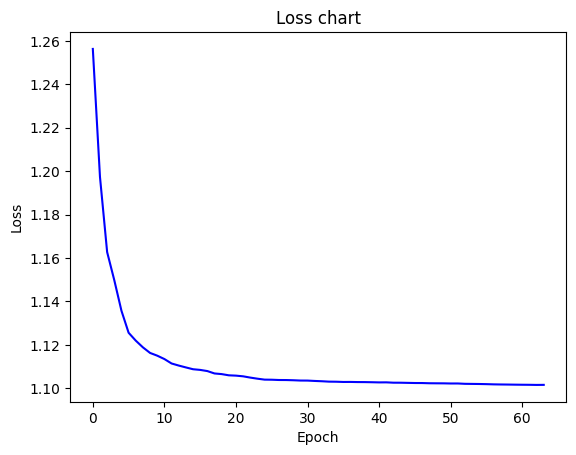

In [11]:
plt.title('Loss chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(MLP.loss_curve_ , color = 'b')

plt.show()

# Validation

البحث عن قيم الباراميترات الأفضل للشبكة العصبونية باستخدام طريقة GridSearch .

و استخدام طريقة التقييم Fold cross validation-5 لتقسيم البيانات

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate_init': [0.001 , 0.01], 'batch_size': [1 , 200]}
grid_search = GridSearchCV(estimator=MLP, param_grid= param_grid , cv=5, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END batch_size=1, learning_rate_init=0.001;, score=0.325 total time=  26.3s
[CV 2/5] END batch_size=1, learning_rate_init=0.001;, score=0.334 total time=  29.8s
[CV 3/5] END batch_size=1, learning_rate_init=0.001;, score=0.325 total time=  49.6s
[CV 4/5] END batch_size=1, learning_rate_init=0.001;, score=0.325 total time=  47.0s
[CV 5/5] END batch_size=1, learning_rate_init=0.001;, score=0.330 total time=  50.9s
[CV 1/5] END batch_size=1, learning_rate_init=0.01;, score=0.334 total time=  54.0s
[CV 2/5] END batch_size=1, learning_rate_init=0.01;, score=0.334 total time=  30.2s
[CV 3/5] END batch_size=1, learning_rate_init=0.01;, score=0.325 total time=  24.9s
[CV 4/5] END batch_size=1, learning_rate_init=0.01;, score=0.334 total time= 1.2min
[CV 5/5] END batch_size=1, learning_rate_init=0.01;, score=0.325 total time= 1.1min
[CV 1/5] END batch_size=200, learning_rate_init=0.001;, score=0.349 total time=   1.3s
[CV 2/5]

عرض قيم الباراميترات الأفضل وعرض دقتها وفقا لعملية البحث ثم اعادة تدريب الشبكة على هذه القيم و عرض دقتها النهائية وعرض مخطط دقتها في كل طور.

In [13]:
print("Best of Hyper Parameter :" , grid_search.best_params_, "\nScore : " , grid_search.best_score_ , "\nBest estimator : :", grid_search.best_estimator_)

Best of Hyper Parameter : {'batch_size': 200, 'learning_rate_init': 0.001} 
Score :  0.3402269861286255 
Best estimator : : MLPClassifier(activation='tanh', batch_size=200, hidden_layer_sizes=(5,),
              max_iter=5000, random_state=1, solver='sgd')


In [14]:
MLP2 = grid_search.best_estimator_.fit(X_train,y_train)
print("Test score: {:.2f}".format(MLP2.score(X_test, y_test)))

Test score: 0.33


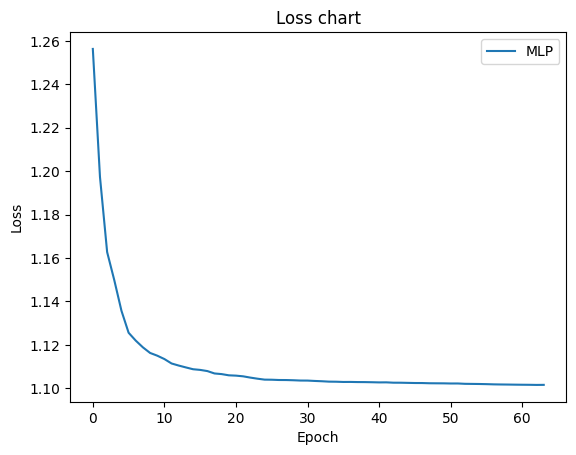

In [15]:
plt.title('Loss chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(MLP2.loss_curve_,label='MLP')
plt.legend(loc='upper right')
plt.show()

تقييم النموذج الأفضل وفقا للمقاييس: ,matrix confusion
.classification report

matrix confusion

In [16]:
from sklearn.metrics import confusion_matrix

ypred = MLP2.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("confusion_matrix(ytest, ypred): \n", cm)

confusion_matrix(ytest, ypred): 
 [[623  19  19]
 [608  17  20]
 [640  20  17]]


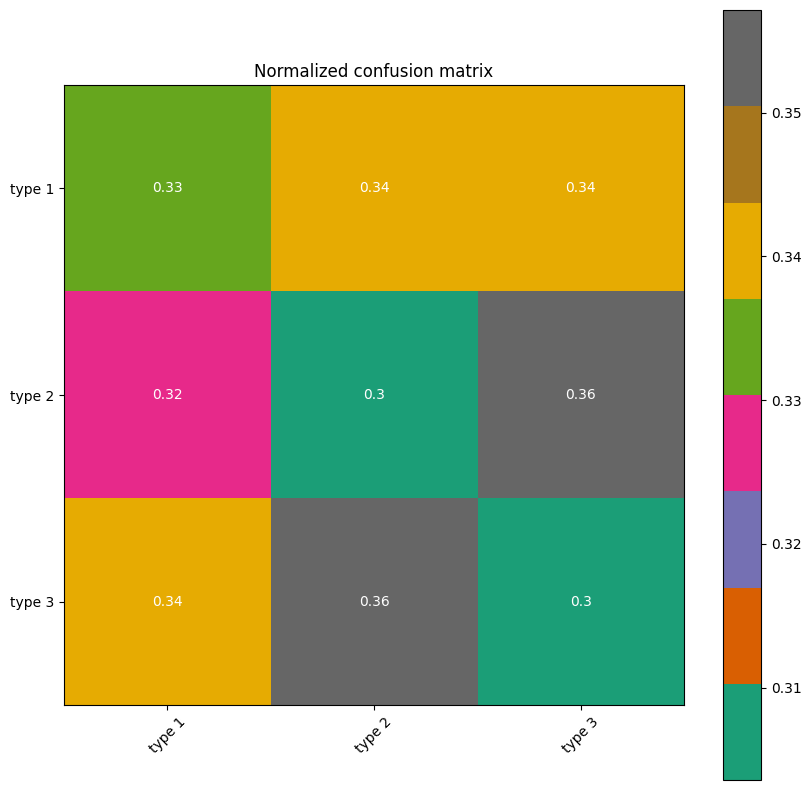

In [17]:
classes = ['type 1', 'type 2' , 'type 3']
cm = cm/np.sum(cm,axis=0)
tick_marks = np.arange(3)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes);

classification report

In [18]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, ypred))

Classification Report:
               precision    recall  f1-score   support

         one       0.33      0.94      0.49       661
       three       0.30      0.03      0.05       645
         two       0.30      0.03      0.05       677

    accuracy                           0.33      1983
   macro avg       0.31      0.33      0.20      1983
weighted avg       0.31      0.33      0.20      1983

